# The Science Behind Netflix Recommendations: Code-Along

One of the easiest libraries to use for recommendation systems is Surprise, which stands for **Simple Python RecommendatIon System Engine**. In this notebook, we'll code a recommendation system using the Surprise Library's Singular Value Decomposition algorithm!

## The Data Science Process

![osemn](https://miro.medium.com/max/3870/1*eE8DP4biqtaIK3aIy1S2zA.png "OSEMN")

In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install surprise

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split

## 1. Reading in the data and a simple exploratory data analysis (EDA)

### First: where is this data from?

https://www.kaggle.com/rounakbanik/the-movies-dataset

In [3]:
df = pd.read_csv('ratings.csv') # pandas' read_csv function
print(df.shape) # how many rows, columns are in the dataframe
df.head(10) # previewing the first 10 rows 

(100004, 4)


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


### a) Ratings

In [4]:
# value_counts() shows us how many times each value appears in a column
ratings = df['rating'].value_counts()
ratings

4.0    28750
3.0    20064
5.0    15095
3.5    10538
4.5     7723
2.0     7271
2.5     4449
1.0     3326
1.5     1687
0.5     1101
Name: rating, dtype: int64

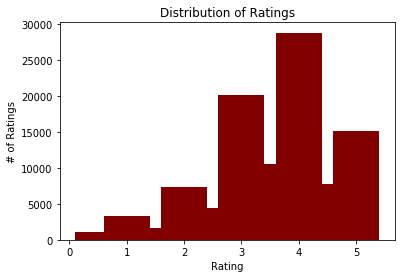

In [5]:
# plot distribution in matplotlib
ratings_sorted = sorted(list(zip(ratings.index, ratings)))
plt.bar([r[0] for r in ratings_sorted], [r[1] for r in ratings_sorted], color='maroon')
plt.xlabel("Rating")
plt.ylabel("# of Ratings")
plt.title("Distribution of Ratings")
plt.show()

### 2. Users

In [6]:
print("Number of users: ", df.userId.nunique()) 
print("Average Number of Reviews per User: ", df.shape[0]/df.userId.nunique())

Number of users:  671
Average Number of Reviews per User:  149.03725782414307


In [7]:
df['userId'].value_counts()[:10]

547    2391
564    1868
624    1735
15     1700
73     1610
452    1340
468    1291
380    1063
311    1019
30     1011
Name: userId, dtype: int64

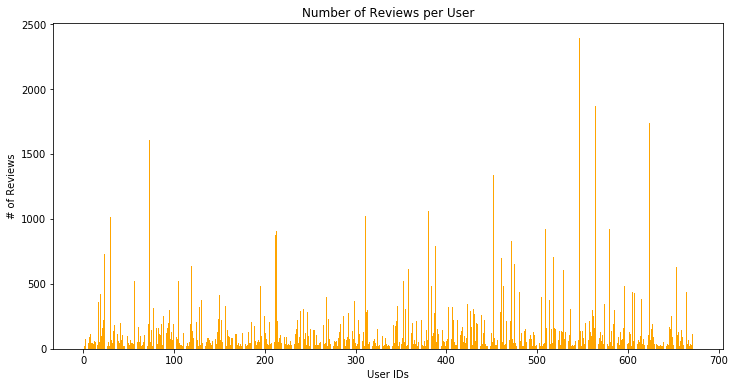

In [8]:
ratings_per_user = df['userId'].value_counts()
ratings_per_user = sorted(list(zip(ratings_per_user.index, ratings_per_user)))
plt.figure(figsize = (12, 6))
plt.bar([r[0] for r in ratings_per_user], [r[1] for r in ratings_per_user], color='orange')
plt.xlabel("User IDs")
plt.ylabel("# of Reviews")
plt.title("Number of Reviews per User")

plt.show()

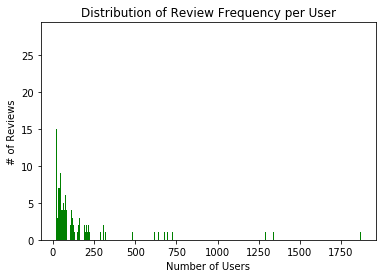

In [9]:
user_ratings = [r[1] for r in ratings_per_user]
sorted_user_ratings = sorted(Counter(user_ratings).items())
plt.bar([r[0] for r in sorted_user_ratings][:-1], [r[1] for r in sorted_user_ratings][:-1], color='green')
plt.xlabel("Number of Users")
plt.ylabel("# of Reviews")
plt.title("Distribution of Review Frequency per User")
plt.show()

### c) Movies

In [10]:
print("Number of movies: ", df.movieId.nunique())
print("Average Number of Reviews per Movie: ", df.shape[0]/df.movieId.nunique())

Number of movies:  9066
Average Number of Reviews per Movie:  11.030664019413193


In [11]:
df['movieId'].value_counts().iloc[:10]

356     341
296     324
318     311
593     304
260     291
480     274
2571    259
1       247
527     244
589     237
Name: movieId, dtype: int64

## 2. Implementing Surprise's SVD
To read more about SVD and its hyperparameters:
https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD

In [12]:
# for Surprise, we only need three columns from the dataset
data = df[['userId', 'movieId', 'rating']]
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_df(data, reader=reader)

# train-test-split
trainset, testset = train_test_split(data, test_size=.2)

In [13]:
testset

[(182, 105, 4.0),
 (187, 141, 4.0),
 (348, 1251, 1.0),
 (388, 2280, 3.0),
 (388, 2640, 4.0),
 (295, 8961, 4.5),
 (185, 919, 3.0),
 (433, 3175, 3.0),
 (134, 608, 4.5),
 (165, 4446, 3.5),
 (639, 427, 3.0),
 (268, 5952, 4.5),
 (146, 1097, 3.5),
 (452, 1407, 3.0),
 (212, 51255, 4.0),
 (431, 2231, 4.5),
 (664, 293, 4.5),
 (564, 2026, 2.0),
 (30, 2757, 2.0),
 (23, 33794, 3.5),
 (165, 1061, 2.5),
 (461, 4951, 2.5),
 (111, 4034, 4.0),
 (624, 117107, 2.5),
 (618, 4308, 4.0),
 (607, 858, 4.5),
 (509, 4378, 3.0),
 (602, 471, 3.0),
 (73, 87869, 3.5),
 (129, 1611, 4.0),
 (533, 1678, 3.0),
 (359, 1198, 3.5),
 (358, 1189, 4.0),
 (165, 2959, 5.0),
 (73, 64197, 4.0),
 (309, 4011, 4.0),
 (657, 165, 3.0),
 (452, 2045, 3.0),
 (199, 6281, 4.0),
 (405, 4534, 4.5),
 (282, 4776, 2.0),
 (38, 2131, 4.5),
 (92, 328, 3.0),
 (57, 1243, 5.0),
 (185, 1947, 4.0),
 (19, 1378, 2.0),
 (388, 5527, 3.0),
 (68, 31374, 4.0),
 (269, 1711, 2.0),
 (93, 1721, 4.0),
 (313, 7458, 4.0),
 (195, 3197, 3.0),
 (547, 55247, 5.0),
 (73,

In [14]:
# instantiate SVD and fit the trainset
svd = SVD()
svd.fit(trainset)

In [15]:
predictions = svd.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8957


0.8957453393143453

## 3. Making Predictions

In [16]:
# taking a look at the first 10 rows of our test set
predictions[:10]

[Prediction(uid=182, iid=105, r_ui=4.0, est=3.7371475352789765, details={'was_impossible': False}),
 Prediction(uid=187, iid=141, r_ui=4.0, est=3.600884232392119, details={'was_impossible': False}),
 Prediction(uid=348, iid=1251, r_ui=1.0, est=3.572770144952377, details={'was_impossible': False}),
 Prediction(uid=388, iid=2280, r_ui=3.0, est=3.5022359667363396, details={'was_impossible': False}),
 Prediction(uid=388, iid=2640, r_ui=4.0, est=3.8638369058528297, details={'was_impossible': False}),
 Prediction(uid=295, iid=8961, r_ui=4.5, est=4.444100545817079, details={'was_impossible': False}),
 Prediction(uid=185, iid=919, r_ui=3.0, est=3.8405849343830383, details={'was_impossible': False}),
 Prediction(uid=433, iid=3175, r_ui=3.0, est=3.7393866991866043, details={'was_impossible': False}),
 Prediction(uid=134, iid=608, r_ui=4.5, est=4.761622599316186, details={'was_impossible': False}),
 Prediction(uid=165, iid=4446, r_ui=3.5, est=2.8501882625188824, details={'was_impossible': False})

In [17]:
print("Number of users: ", df.userId.nunique()) 
print("Number of movies: ", df.movieId.nunique()) 

Number of users:  671
Number of movies:  9066


In [18]:
user = 5
item = 100
svd.predict(user, item)

Prediction(uid=5, iid=100, r_ui=None, est=3.59060315815777, details={'was_impossible': False})

In [19]:
rating_predictions = [item[3] for item in predictions]

In [20]:
actual_ratings = [item[2] for item in testset]

In [21]:
df = pd.DataFrame({'actual_ratings' : actual_ratings, 'rating_predictions' : rating_predictions})

In [22]:
df

,actual_ratings,rating_predictions
0,4.0,3.737148
1,4.0,3.600884
2,1.0,3.572770
3,3.0,3.502236
4,4.0,3.863837
5,4.5,4.444101
6,3.0,3.840585
7,3.0,3.739387
8,4.5,4.761623
9,3.5,2.850188


In [23]:
import matplotlib.pyplot as plt

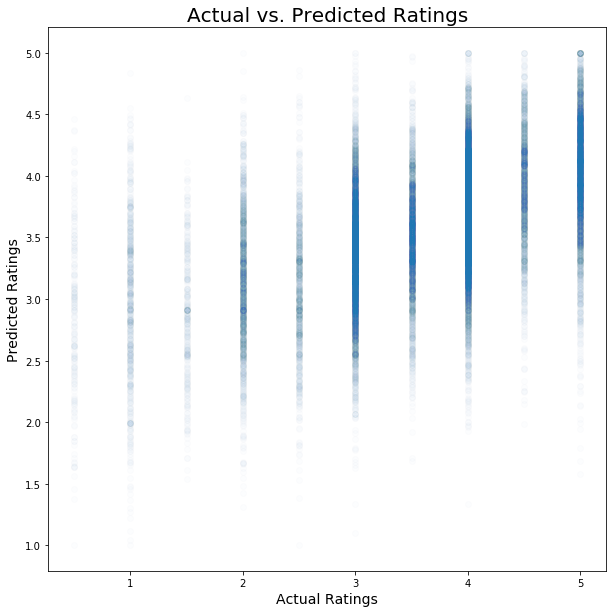

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(x=actual_ratings, y=rating_predictions, alpha = .01)
plt.xlabel('Actual Ratings', fontsize = 14)
plt.ylabel('Predicted Ratings', fontsize = 14)
plt.title('Actual vs. Predicted Ratings', fontsize = 20);